In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from helper import *

main = pd.read_pickle("../clean_main.df")

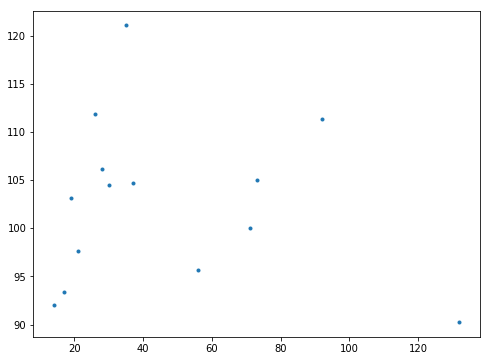

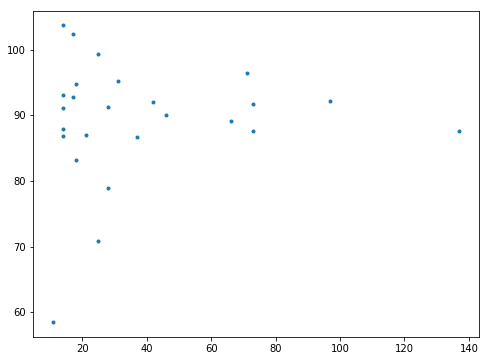

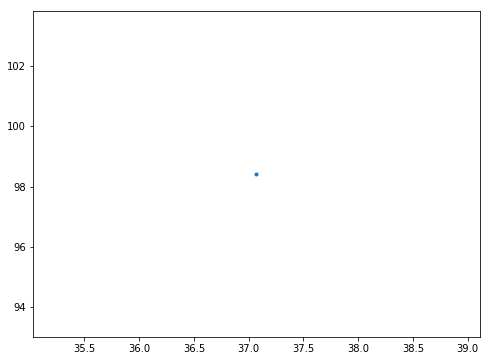

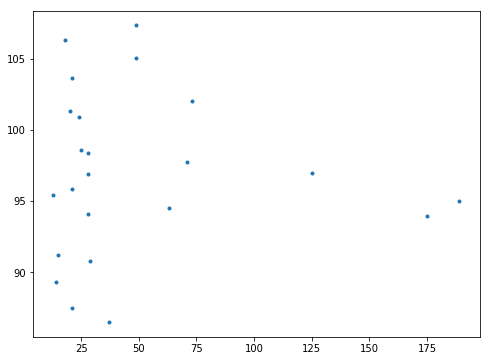

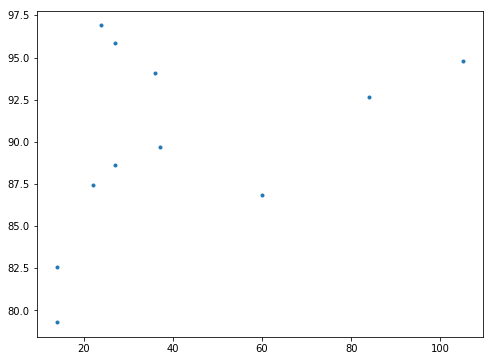

In [2]:
# if days since last run is > 365, then it shoudl all be the same ? Ignore for now

for i in range(5):
    j = np.random.randint(-100, -1)
    horse = main.iloc[j, :]["horse_id"]
    races = main.loc[main.horse_id == horse]
    plt.figure(figsize=(8,6))
    plt.plot(races["days_since_last_run"], races["speed_rating"], ".")
    
# Process: get old races for a horse - do a linear fit - use fit to predict how it will do with this rest
# SHOULD ACTUALLY DO THIS WITH SPEED RATING

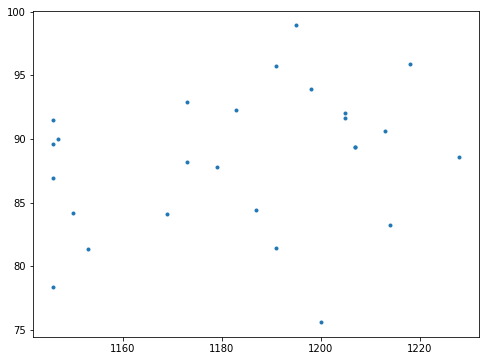

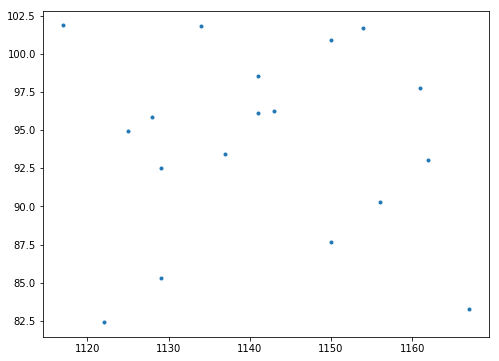

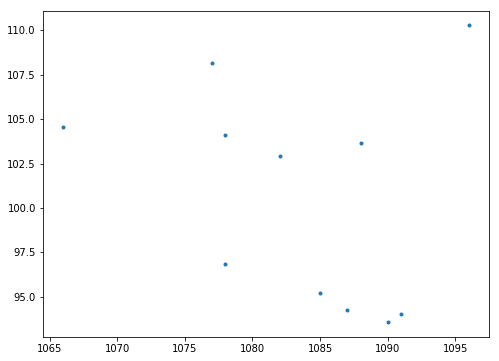

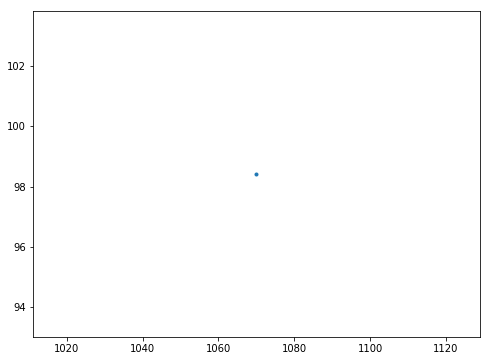

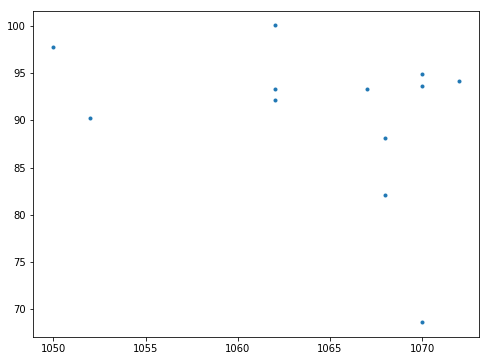

In [3]:
# Speed rating and declared weight
for i in range(5):
    j = np.random.randint(-100, -1)
    horse = main.iloc[j, :]["horse_id"]
    races = main.loc[main.horse_id == horse]
    plt.figure(figsize=(8,6))
    plt.plot(races["declared_weight"], races["speed_rating"], ".")

In [4]:
# The code
from sklearn.linear_model import LinearRegression
rest_impact = np.zeros(len(main))
weight_impact = np.zeros(len(main))

horses = np.unique(main["horse_id"])
c = 0
for horse_id in horses:
    printProgress(c, len(horses), round(len(horses)*0.01))
    c += 1
    
    horse_races = main.loc[main.horse_id == horse_id]
    raceI = horse_races.index
    n = horse_races.shape[0]

    for i in range(n):
        if i == 0:
            rest = 80
            weight = 80
        elif i==1:
            rest = horse_races.iloc[0,:]["speed_rating"]
            weight = horse_races.iloc[0,:]["speed_rating"]
        else: #Perform linear regression
            weights = horse_races.iloc[:i, :]["declared_weight"].to_numpy().reshape(-1,1)
            rests = horse_races.iloc[:i, :]["days_since_last_run"].to_numpy().reshape(-1,1)
            target = horse_races.iloc[:i, :]["speed_rating"].to_numpy().reshape(-1,1)
            
            weightModel = LinearRegression()
            restModel = LinearRegression()
            
            weightModel.fit(weights, target)
            restModel.fit(rests, target)
            
            currentRest = horse_races.iloc[i,:]["days_since_last_run"]
            currentWeight = horse_races.iloc[i,:]["declared_weight"]
            
            weight = weightModel.coef_[0] * currentWeight + weightModel.intercept_
            rest = restModel.coef_[0] * currentRest + restModel.intercept_
            
        weight_impact[raceI[i]] = weight
        rest_impact[raceI[i]] = rest

main["weight_rating"] = weight_impact
main["rest_rating"] = rest_impact

0.00% Complete ...
0.99% Complete ...
1.99% Complete ...
2.98% Complete ...
3.97% Complete ...
4.97% Complete ...
5.96% Complete ...
6.95% Complete ...
7.94% Complete ...
8.94% Complete ...
9.93% Complete ...
10.92% Complete ...
11.92% Complete ...
12.91% Complete ...
13.90% Complete ...
14.90% Complete ...
15.89% Complete ...
16.88% Complete ...
17.88% Complete ...
18.87% Complete ...
19.86% Complete ...
20.85% Complete ...
21.85% Complete ...
22.84% Complete ...
23.83% Complete ...
24.83% Complete ...
25.82% Complete ...
26.81% Complete ...
27.81% Complete ...
28.80% Complete ...
29.79% Complete ...
30.79% Complete ...
31.78% Complete ...
32.77% Complete ...
33.76% Complete ...
34.76% Complete ...
35.75% Complete ...
36.74% Complete ...
37.74% Complete ...
38.73% Complete ...
39.72% Complete ...
40.72% Complete ...
41.71% Complete ...
42.70% Complete ...
43.70% Complete ...
44.69% Complete ...
45.68% Complete ...
46.67% Complete ...
47.67% Complete ...
48.66% Complete ...
49.65% Comp

In [5]:
main.to_pickle("../clean_main.df")